In [23]:
import json

together = json.loads(open('StudyTogether.json', encoding='utf-8').read())
separate = json.loads(open('StudySeparate.json', encoding='utf-8').read())
manual = json.loads(open('Study (manual).json', encoding='utf-8').read())
v2 = json.loads(open('StudyV2.json', encoding='utf-8').read())

**Cronbach’s alpha** is a measure of internal consistency or reliability for a set of items (like questions on a survey), not for a set of respondents. It’s used to determine whether a collection of items consistently measures the same characteristic.

**If you only have two respondents, it’s not appropriate to calculate Cronbach’s alpha.** This is because Cronbach’s alpha is based on the variance of the scores, and with only two respondents, there’s not enough data to reliably estimate the variance.

In [2]:
class Kappa:
    def __init__(self, question, label1, label2):
        self.question = question
        self.label1 = label1
        self.label2 = label2
        self.scores1 = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
        self.scores2 = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
        self.total = 0
        self.agree = 0
        self.result = []

    def add(self, scr1, scr2):
        self.scores1[str(scr1)] += 1
        self.scores2[str(scr2)] += 1

        if scr1 == scr2:
            self.agree += 1
        self.total += 1

    def calculate(self):
        observed_agreement = self.agree / self.total
        expected_agreement = 0
        for key in self.scores1:
            expected_agreement += (self.scores1[key] / self.total) * (self.scores2[key] / self.total)
            self.result.append(f"({self.scores1[key]} / {self.total}) * ({self.scores2[key]} / {self.total})")

        return (observed_agreement - expected_agreement) / (1 - expected_agreement)

    def __str__(self):
        self.result = [
            f"\nQuestion: {self.question}", f"Scores {self.label1}: {json.dumps(self.scores1)}",
            f"Scores {self.label2}: {json.dumps(self.scores2)}",
            f"Agree: {self.agree} | Total: {self.total} | Observed agreement: {self.agree / self.total}"]
        
        kappa = self.calculate()
        self.result.append(f"Kappa: {kappa}")
            
        return "\n".join(self.result)


def calculate_kappa(study1, label1, study2, label2):
    kappas = []
    articles = list(study1.keys())
    questions = list(study1[articles[0]].keys())

    for question in questions:
        kappas.append(Kappa(question, label1, label2))

    for article in articles:
        for index, question in enumerate(questions):
            kappas[index].add(study1[article][question], study2[article][question])

    for kappa in kappas:
        print(kappa)



In [17]:
calculate_kappa(together, 'together', manual, 'manual')


Question: Q1
Scores together: {"0": 0, "1": 0, "2": 0, "3": 11, "4": 1}
Scores manual: {"0": 0, "1": 0, "2": 0, "3": 0, "4": 12}
Agree: 1 | Total: 12 | Observed agreement: 0.08333333333333333
(0 / 12) * (0 / 12)
(0 / 12) * (0 / 12)
(0 / 12) * (0 / 12)
(11 / 12) * (0 / 12)
(1 / 12) * (12 / 12)
Kappa: 0.0

Question: Q3
Scores together: {"0": 0, "1": 0, "2": 11, "3": 1, "4": 0}
Scores manual: {"0": 0, "1": 7, "2": 0, "3": 2, "4": 3}
Agree: 0 | Total: 12 | Observed agreement: 0.0
(0 / 12) * (0 / 12)
(0 / 12) * (7 / 12)
(11 / 12) * (0 / 12)
(1 / 12) * (2 / 12)
(0 / 12) * (3 / 12)
Kappa: -0.01408450704225352

Question: Q4
Scores together: {"0": 1, "1": 0, "2": 4, "3": 3, "4": 4}
Scores manual: {"0": 2, "1": 0, "2": 1, "3": 2, "4": 7}
Agree: 6 | Total: 12 | Observed agreement: 0.5
(1 / 12) * (2 / 12)
(0 / 12) * (0 / 12)
(4 / 12) * (1 / 12)
(3 / 12) * (2 / 12)
(4 / 12) * (7 / 12)
Kappa: 0.30769230769230765

Question: Q5
Scores together: {"0": 0, "1": 0, "2": 2, "3": 10, "4": 0}
Scores manual:

In [4]:
calculate_kappa(separate, 'separate', manual, 'manual')


Question: Q1
Scores separate: {"0": 0, "1": 0, "2": 0, "3": 12, "4": 0}
Scores manual: {"0": 0, "1": 0, "2": 0, "3": 0, "4": 12}
Agree: 0 | Total: 12 | Observed agreement: 0.0
(0 / 12) * (0 / 12)
(0 / 12) * (0 / 12)
(0 / 12) * (0 / 12)
(12 / 12) * (0 / 12)
(0 / 12) * (12 / 12)
Kappa: 0.0

Question: Q3
Scores separate: {"0": 0, "1": 0, "2": 7, "3": 4, "4": 1}
Scores manual: {"0": 0, "1": 7, "2": 0, "3": 2, "4": 3}
Agree: 1 | Total: 12 | Observed agreement: 0.08333333333333333
(0 / 12) * (0 / 12)
(0 / 12) * (7 / 12)
(7 / 12) * (0 / 12)
(4 / 12) * (2 / 12)
(1 / 12) * (3 / 12)
Kappa: 0.007518796992481206

Question: Q4
Scores separate: {"0": 1, "1": 1, "2": 5, "3": 5, "4": 0}
Scores manual: {"0": 2, "1": 0, "2": 1, "3": 2, "4": 7}
Agree: 4 | Total: 12 | Observed agreement: 0.3333333333333333
(1 / 12) * (2 / 12)
(1 / 12) * (0 / 12)
(5 / 12) * (1 / 12)
(5 / 12) * (2 / 12)
(0 / 12) * (7 / 12)
Kappa: 0.24409448818897636

Question: Q5
Scores separate: {"0": 0, "1": 0, "2": 3, "3": 8, "4": 1}
Sc

Question: Q4
Scores separate: {"0": 1, "1": 1, "2": 5, "3": 5, "4": 0}
Scores manual: {"0": 2, "1": 0, "2": 1, "3": 2, "4": 7}
Agree: 4 | Total: 12 | **Observed agreement: 0.3333333333333333**
(1 / 12) * (2 / 12)
(1 / 12) * (0 / 12)
(5 / 12) * (1 / 12)
(5 / 12) * (2 / 12)
(0 / 12) * (7 / 12)
**Kappa: 0.24409448818897636**


Question: Q6
Scores separate: {"0": 0, "1": 0, "2": 1, "3": 6, "4": 5}
Scores manual: {"0": 0, "1": 0, "2": 1, "3": 1, "4": 10}
Agree: 6 | Total: 12 | **Observed agreement: 0.5**
(0 / 12) * (0 / 12)
(0 / 12) * (0 / 12)
(1 / 12) * (1 / 12)
(6 / 12) * (1 / 12)
(5 / 12) * (10 / 12)
**Kappa: 0.17241379310344823**


**Cohen’s kappa can sometimes give counter-intuitive results.**

In your example, for Question 6 (Q6), the observed agreement is higher than for Question 4 (Q4) (0.5 vs 0.333), but the kappa value is lower (0.172 vs 0.244). This can happen because kappa not only takes into account the observed agreement, but also the agreement that would be expected by chance given the distribution of ratings.

For Q6, both raters have a strong preference for the score “4”. Because of this, even if they were assigning scores randomly, we would expect a high level of agreement just by chance. Kappa corrects for this chance agreement, and in doing so, it gives a lower value, indicating less agreement beyond what would be expected by chance.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
questions_labels = ['Q1', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']

In [20]:
# Getting the average score per question
def average_score_per_question():
    studies = [together, separate, manual, v2]
    scores_q1 = [0, 0, 0, 0]
    scores_q3 = [0, 0, 0, 0]
    scores_q4 = [0, 0, 0, 0]
    scores_q5 = [0, 0, 0, 0]
    scores_q6 = [0, 0, 0, 0]
    scores_q7 = [0, 0, 0, 0]
    scores = [scores_q1, scores_q3, scores_q4, scores_q5, scores_q6, scores_q7]
    x_label = ['Together', 'Separate', 'Manual', 'V2']
    
    for article in together.keys():
        for index, question in enumerate(together[article].keys()):
            for j, s in enumerate(studies):
                scores[index][j] += s[article][question]
                
                
    total_articles = len(together.keys())
    for j, question in enumerate(scores):
        for index, s in enumerate(question):
            scores[j][index] = s / total_articles
        
    # print(scores)
        
    fig, axs = plt.subplots(2, 3, figsize=(12, 6))
    
    for i, ax in enumerate(axs.flat):
        if i < len(scores):
            bars = ax.bar(x_label, scores[i], color='b')
            ax.set_ylim(0, 4)
            ax.set_title(questions_labels[i])
            ax.set_xlabel('Methods')
            ax.set_ylabel('Average score')
            
            for b in bars:
                y = b.get_height()
                ax.text(b.get_x() + b.get_width()/2, y - 0.4, round(y, 2), ha='center', va='bottom', color='white')
        else:
            ax.axis("off")
            
    plt.subplots_adjust(hspace=0.4)
    plt.tight_layout()
    plt.savefig('Images/Average Score Per Question.png')
    plt.show()            

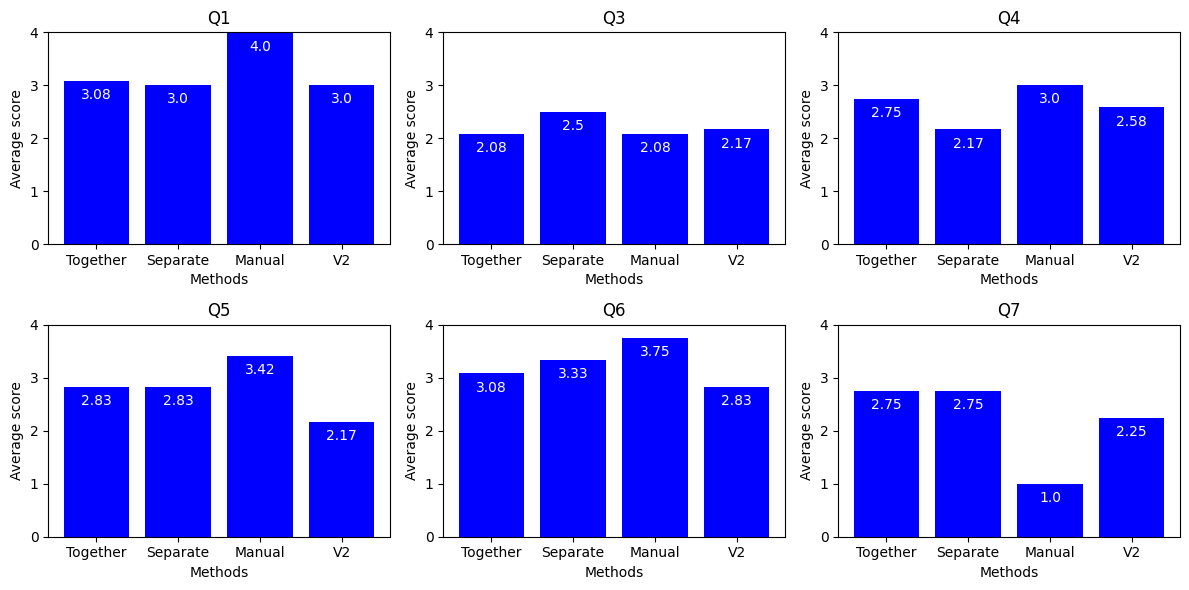

In [21]:
average_score_per_question()

In [18]:
# Average absolute difference between studies per question
def difference_between_methods(subplot, study1, label1, study2, label2):
    questions = [0, 0, 0, 0, 0, 0]
    
    for art in study1.keys():
        for position, q in enumerate(questions_labels):
            questions[position] += abs(study1[art][q] - study2[art][q])
            
    number_of_articles = len(study1.keys())
    avg_questions = [q / number_of_articles for q in questions]
    print(avg_questions)
    
    # figure, ax1 = plt.subplots(figsize=(6, 3))
    bars_plt = subplot.barh(questions_labels, avg_questions, color='b') 
    subplot.axvline(x=1.0, color='r', linestyle='-')  
    subplot.set_xlim(0, 2.1)  
    subplot.set_title(f'{label1} vs {label2}')
    subplot.set_ylabel('Questions')
    subplot.set_xlabel('Average absolute difference between studies per question')
    
    for bar in bars_plt:
        xval = bar.get_width() 
        subplot.text(xval - 0.025, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', color='white')
    

[0.9166666666666666, 1.1666666666666667, 0.9166666666666666, 0.75, 0.8333333333333334, 1.75]
[1.0, 1.4166666666666667, 1.3333333333333333, 0.75, 0.5833333333333334, 2.0833333333333335]
[1.0, 0.9166666666666666, 0.9166666666666666, 1.25, 1.0833333333333333, 1.4166666666666667]


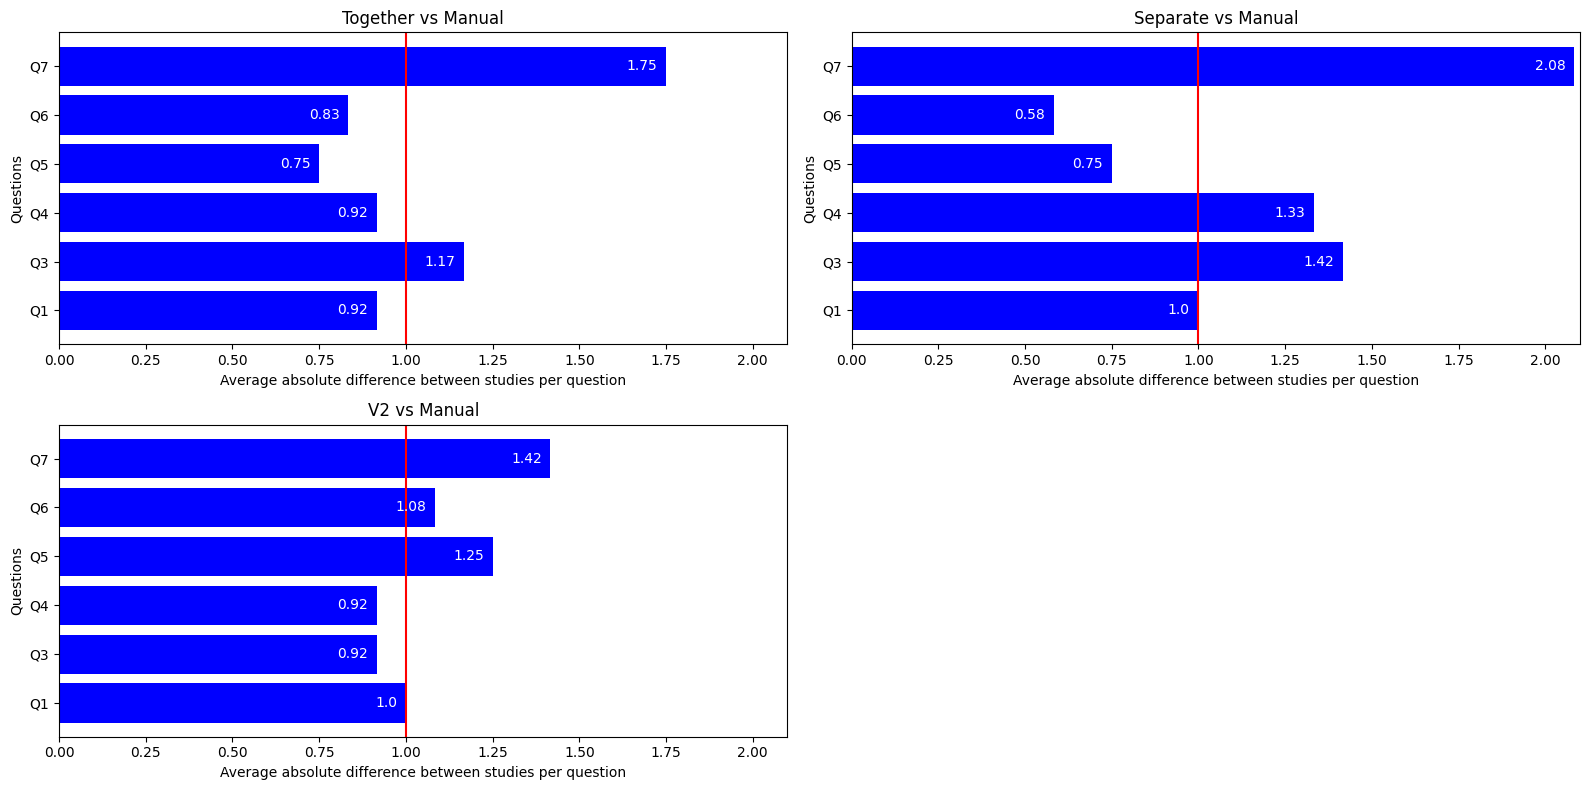

In [22]:
def plot_absolute_differences():
    fig, axs = plt.subplots(2, 2, figsize=(16, 8))
    
    difference_between_methods(axs[0, 0], together, 'Together', manual, 'Manual')
    difference_between_methods(axs[0, 1], separate, 'Separate', manual, 'Manual')
    difference_between_methods(axs[1, 0], v2, 'V2', manual, 'Manual')
    axs[1,1].axis("off")
    
    plt.tight_layout()
    plt.savefig(f'Images/Absolute_Difference.png')
    plt.show()
plot_absolute_differences()


In [113]:
# Average absolute difference between studies
def average_abs_difference(study1, label1, study2, label2):
    differences = []
    
    for article in study1.keys():
        total1, total2 = 0, 0
        for q in questions_labels:
            total1 += study1[article][q]
            total2 += study2[article][q]
            
        differences.append(abs(total1 - total2))
    print(f"Between {label1} and {label2}")
    print("\tAbsolute Differences: ", differences)
    print(f'\tAverage absolute difference: {sum(differences) / len(differences)}')  


In [114]:
average_abs_difference(together, 'Together', manual, 'Manual')

Between Together and Manual
	Absolute Differences:  [2, 1, 1, 4, 3, 4, 5, 6, 0, 6, 4, 0]
	Average absolute difference: 3.0


In [102]:
# Scores distribution per question
from matplotlib.ticker import MaxNLocator

def scores_distribution_per_question(methods_labels, methods, label_function):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    
    scores_labels = ['0', '1', '2', '3', '4']
    
    questions_distribution = []
    number_of_methods = len(methods)
    for _ in questions_labels:
        questions_distribution.append([[0, 0, 0, 0, 0] for _ in range(number_of_methods)])
        
    for article in together.keys():
        # print("Article: ", article)
        for index, question in enumerate(questions_labels):
            # print("\tQuestion: ", question)
            for j, m in enumerate(methods):
                score = m[article][question]
                # print("\t\tScore: ", score)
                # print(questions_distribution[index])
                questions_distribution[index][j][score] += 1
                # print(questions_distribution[index])
                
    bar_height = 0.2
    y = np.arange(len(scores_labels))
    for index, ax in enumerate(axs.flat):
        bars_plt = []
        for i, method in enumerate(methods):
            # yi = y + ((3-i*2)/2)*bar_height if i < 2 else y - ((i*2-3)/2)*bar_height
            bars_plt.extend(ax.barh(label_function(y, i, bar_height), questions_distribution[index][i], height=bar_height, label=methods_labels[i]))
        # ax.axvline(x=1.0, color='r', linestyle='-')  
        ax.set_xlim(0, 12)  
        ax.set_title(questions_labels[index])
        ax.set_ylabel('Scores')
        ax.set_xlabel('Number of Times Assigned')
        ax.legend(methods_labels, loc='lower right')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        for bar in bars_plt:
            xval = bar.get_width() 
            xlabel = xval - 0.05 if xval > 0 else xval + 0.25
            color = 'white' if xval > 0 else 'black'
            ax.text(xlabel, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center', color=color)

    plt.tight_layout()
    plt.savefig(f'Images/ScoresDistribution {methods_labels}.png')
    plt.show()


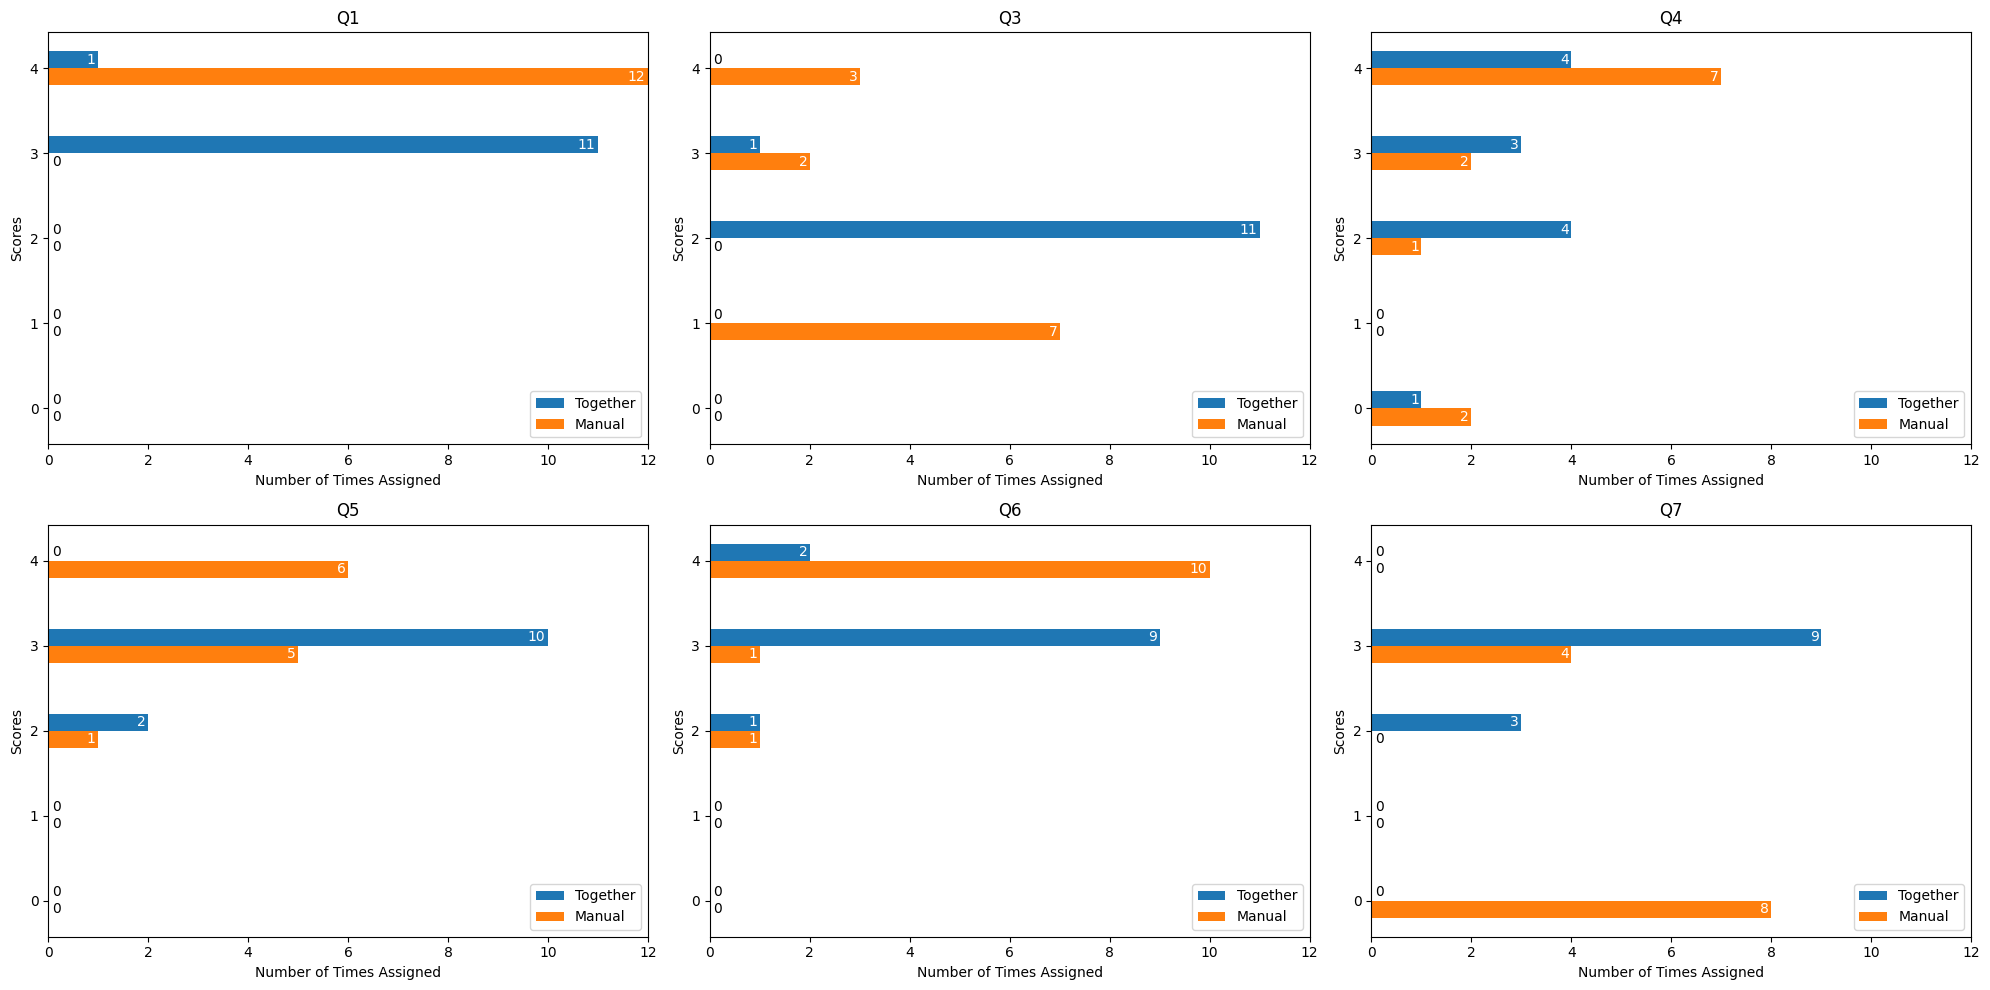

In [103]:
# methods_labels = ['Together', 'Separate', 'Manual', 'V2']
# methods = [together, separate, manual, v2]
def label_4bars(y, i, bar_height):
    return y + ((3-i*2)/2)*bar_height if i < 2 else y - ((i*2-3)/2)*bar_height

def label_3bars(y, i, bar_height):
    return y + bar_height if i < 1 else (y if i == 1 else y - bar_height)

def label_2bars(y, i, bar_height):
    return y + bar_height/2 if i == 0 else y - bar_height/2

scores_distribution_per_question(['Together', 'Manual'], [together, manual], label_2bars)

In [114]:
import pandas as pd

def save_studies_comparasion_in_df(study1, label1, study2, label2):
    columns = []
    for q in questions_labels:
        columns.append((q, label1))
        columns.append((q, label2))
        
    df = pd.DataFrame(columns=columns)
    
    for art in study1.keys():
        row = []
        for q in questions_labels:
            row.append(study1[art][q])
            row.append(study2[art][q])
        df.loc[art] = row
        
    print(df.columns)
    df.to_excel(f'Dataframes/{label1} vs {label2}.xlsx')
    return df

In [115]:
save_studies_comparasion_in_df(together, 'Together', manual, 'Manual')

Index([('Q1', 'Together'),   ('Q1', 'Manual'), ('Q3', 'Together'),
         ('Q3', 'Manual'), ('Q4', 'Together'),   ('Q4', 'Manual'),
       ('Q5', 'Together'),   ('Q5', 'Manual'), ('Q6', 'Together'),
         ('Q6', 'Manual'), ('Q7', 'Together'),   ('Q7', 'Manual')],
      dtype='object')


,"(Q1, Together)","(Q1, Manual)","(Q3, Together)","(Q3, Manual)","(Q4, Together)","(Q4, Manual)","(Q5, Together)","(Q5, Manual)","(Q6, Together)","(Q6, Manual)","(Q7, Together)","(Q7, Manual)"
Automatic Detection of Inconsistencies and Hierarchical Topic Classification for Open-Domain Chatbots,3,4,2,1,4,4,3,3,3,4,3,0
Cicognini at ACTI: Analysis of techniques for conspiracies individuation in Italian,3,4,2,1,0,0,3,3,3,4,2,0
Query-Focused Submodular Demonstration Selection for In-Context Learning in Large Language Models,3,4,2,1,2,2,3,2,4,4,3,3
MetRoBERTa: Leveraging Traditional Customer Relationship Management Data to Develop a Transit-Topic-Aware Language Model,3,4,2,3,3,4,3,4,4,4,3,3
Semi-Automatic Topic Discovery and Classification for Epidemic Intelligence via Large Language Models,3,4,2,3,2,3,3,4,3,4,2,0
ACTI at EVALITA 2023:Automatic Conspiracy Theory Identification Task Overview,3,4,3,4,2,4,3,4,3,4,2,0
LAraBench: Benchmarking Arabic AI with Large Language Models,3,4,2,4,4,4,2,3,3,4,3,3
Leveraging Large Language Models for Topic Classification in the Domain of Public Affairs,3,4,2,1,4,0,3,3,3,4,3,0
Improving short text classification with augmented data using GPT-3,3,4,2,1,3,4,2,4,3,3,3,0
ChatGPT Label: Comparing the Quality of Human-Generated and LLM-Generated Annotations in Low-Resource Language NLP Tasks,3,4,2,4,3,3,3,4,2,4,3,3
